# Question 1

## Part a

High variance in the rewards from each website version might make it harder to accurately estimate the expected value of each arm, and may lead to increased exploration as the algorithm tries to determine whether observed differences in rewards are due to randomness or actual differences in performance. For example, an option with a higher average reward might occasionally yield very low rewards, potentially misleading the algorithm during the exploration phase. 

Similarly, if the performance of the different versions is very close to each other, distinguishing the best version becomes harder and requires more samples. This may increase the regret as well as the algorithm might spend a lot of time exploring slightly inferior options.

A non-stationary environment (user preferences and behaviors changing over time due to seasonal effects, changing user preferences, competitors' actions, etc.) might be present which can also make it difficult for the algorithm to maintain an accurate estimate of each arm's value as past data may no longer be suitable for predicting future rewards. Thus the algorithm needs to adapt to the changes which can increase regret if it's too slow to recognize and respond to these shifts.

There can be a delay between a user interaction with a version and when that interaction results in measurable profit (a user may add items to a cart but only complete the purchase days later). In this case, the regret might be increased as well if the algorithm makes decisions based on outdated information.

## Part b

High variance in the rewards can significantly affect the power of an A/B test because it requires a larger sample size to achieve the same power or the algorithm to run for longer periods, as it's harder to distinguish the trure effect from the noise.

When the performance the performance of the different versions is very close to each other, detecting those differences requires a more powerful test. This usually means needing a larger sample size to achieve statistical significance, as minor differences are harder to detect amidst random variability.

Non-stationarity can reduce the power of an A/B test because the underlying conversion rates or effect sizes may change over the course of the test and detecting a consistent effect becomes more difficult, requiring longer test durations or more sophisticated statistical methods to account for variability over time.

Delays in obtaining the feedback of an experiment can complicate the timing of an A/B test, it might prolong the duration of the test to capture the full effect, potentially reducing the test's sensitivity if not properly accounted for in the design phase.

## Part c

Assuming group A is considered the better-performing group and the probability for assigning users to it is 0.8, the procedure is biased towards exploitation. At the same time the allocation probability of 0.2 for group B indicates limited exploration, as fewer users are assigned to this group, which could lead to gathering insufficient data about version B. This might be crucial if  the actual performance of B is close to or better than A's but is not immediately apparent due to initial variance or small sample size. Finally, the aim of achieving a set power of 0.8 without adjusting the exploration-exploitation allocation ratio based on real-time performance data suggests a static approach rather than a truly adaptive one. In summary, the procedure incorporates elements of both exploration and exploitation, but its static allocation ratio and the set power of 0.8 without dynamically adjusting based on interim results suggest it may not fully or efficiently balance the exploration vs. exploitation trade-off.

## Part d

When performing adaptive hypothesis testing (AHT) we can expect a higher allocation probability for the arm with the higher expected reward (exploitation), and thus it might have higher initial regret (it explores less than the UCB) than UCB. Once the wanted power of 0.8 is achieved it may continue to exploit the arm with the higher observed reward, potentially leading to lower regret growth over time as it becomes more confident in the better arm. The power of the test should increase steadily as it continues to collect data, because the procedure focuses on confirming the hypothesis that one arm is better than the other. Generally, AHT is designed to quickly achieve high power, which means it can reliably detect a difference when there is one.

With the upper confidence bound (UCB) method we have a design such that is balances exploration and exploitation, leading to lower regret over time as it more efficiently identifies and exploits the best arm. UCB continues to explore to some degree, so it may not achieve as high power as quickly as AHT, which is focused more on exploitation once a certain level of confidence is reached.

**Figure 1, (a) Regret**: The line with lower regret (blue, Method 2) would likely correspond to the UCB algorithm, given its characteristic of balancing exploration and exploitation to minimize regret. The line with higher regret (red, Method 1) growing more slowly after a certain number of iterations is consistent with AHT.
  
**Figure 1, (b) Power**: The line with a steeper increase (red, method 1), thus reaching the desired power more quickly, would likely be the AHT procedure, since it continues to allocate users to the favored arm even after reaching the desired power level, thus exploiting the arm that it considers to be better. The blue line reaches the desired power slowlier which fits with the UCB's approach of continued exploration even after finding a good arm.

Therefore, the red line (Method I) likely represents AHT, and the blue line (Method II) likely represents the UCB algorithm.

## Part e

The $\epsilon$-Greedy algorithm with $\epsilon = 0.2$ will explore non-greedy actions, such as choosing randomly amon all available actions, 20% of the time without taking into consideration the value of the arms. Thus, it will exploit the current best-known action, such as choosing the highest estimated reward, 80% of the time. In this procedure the probabilites of exploration and exploitation are fixed.

AHT, as mentioned earlier, is biased towards the arm believed to be better (group A with 0.8 allocation probability) with an 80% chance of being selected. The procedure is more focused on confirming a hypothesis than on minimizing regret.

Having said that, we can conclude the similarities with AHT are that both procedures have a 20% chance of exploring the less-chosen option, and respectively show a preference for exploitation by assigning a higher probability of 80% to the option that is currently believed to be the best. In terms of differences, AHT continues until a statistical power of 0.8 is achieved and then maintains the allocation ratio even after that power is achieved. Whereas, the ε-greedy algorithm does not adapt its exploration rate based on the observed outcomes, and continues with the fixed ε rate throughout the entire process, meaning $\epsilon$-greedy does not take statistical power into account in its decision-making process.

**Expected performance relative to:**

**UCB**: The $\epsilon$-greedy algorithm with ε = 0.2 will likely perform with more consistent exploration than the UCB algorithm. UCB is adaptive and reduces exploration over time as it becomes more confident in the best option, meaning UCB is likely to converge to the optimal arm faster than the $\epsilon$-greedy algorithm with a fixed exploration rate. Moreover, $\epsilon$-greedy may have higher regret than UCB, as it continues to explore even when it may not be necessary.
  
**AHT**: The $\epsilon$-greedy algorithm might have a slower rate of increase in power because it does not adapt its exploration based on the power of the test. It may exhibit higher cumulative regret compared to the adaptive procedure if the latter effectively reduces exploration after reaching sufficient power. 

In summary, we would expect the $\epsilon$-greedy algorithm to potentially have a regret curve similar to the adaptive procedure initially but without the tapering off since $\epsilon$-greedy does not reduce exploration over time. Its power curve might increase more gradually compared to the adaptive procedure, as $\epsilon$-greedy does not change its allocation in response to achieved power.

## Part f

**Bandit Algorithms:**

**Pros**: The aim is to minimize regret, so they are good at quickly identifying and exploiting the best option to maximize rewards. The bandit algorithms learn and adapt based on user interactions, making them suitable for non-stationary environments. They can also be more resource-efficient because of dynamically allocating more traffic to better-performing variants, leading to potentially higher overall returns during the testing period. And because they are adaptive, they can provide real-time optimization, which is crucial in fast-paced environments.

**Cons**: A bandit algorithm implementation can be more complex than a traditional A/B test. Bandit algorithms might converge on a suboptimal option if not enough exploration is done or if the environment changes after convergence. Since users are not evenly distributed across variants, it can be harder to understand the underlying behavior that led to the observed outcomes.

**AHT:**

**Pros**: AHT is conceptually simpler and widely understood, making it easier to implement and explain to stakeholders which is important. AHT may come with a predefined level of statistical power (as in our case) and significance, which can provide confidence in the results and help avoid Type I and Type II errors.

**Cons**: Traditional AHT are not adaptive - during the course of the algorithm run there are no adjustments based on interim results. AHT requires the collection of a large amount of data to reach statistical significance making it slower in producing results which is bad in fast paced environments. In non-stationary environments AHT can become outdated, whereas bandit algorithms can adapt to such changes.

# Question 2

## Part a

We can use the historical data in UCB for initial estimates for the rewards of each arm rather than starting from the beginning without any infomration. In that way we are reducing the exploration time needed, and hence can fasten the convergence to the best arm.

Idea:
- initialise UCB with historical means as the estimate for each arm's reward, and counts as the number of times an arm was pulled
- compute confidence bounds using the historical data
- continue with standard UCB (historical pulls are included in the counts, affecting the computation of the confidence bounds)

```
// initial estimates from historical data
for each arm i=1 to K:
    n_i = number of times arm i was played in historical data
    x_i = average reward of arm i from historical data

for each round t=K+1, K+2, ... , n:
    for each arm i=1 to K:
        // calculate the UCB value for each arm
        ucb_i = x_i + sqrt(2 * log(t) / n_i)
    
    chosen_arm = argmax(ucb_i)  // select arm with highest UCB value
    // observe reward R_chosen_arm from chosen_arm
    // update rewards and counts of chosen_arm
    n_chosen_arm += 1
    x_chosen_arm = x_chosen_arm + (R_chosen_arm - x_chosen_arm) / n_chosen_arm
```

Using historical data affects the exploration vs. exploitation tradeoff in the following ways:

- As already mentioned, the algorithm starts with prior knowledge leading to reduced amount of exploration
- Since we can obtain the counts from the historical data they are already higher leading to tighter confidence bounds in the beginning, hence the algorithm is more confident about the estimated rewards. Or, more exploitation of the better-performing arms is present (according to historical data).
- Following from the above point is the possibility of having a bias towards the arms that performed well historically, but this might become a problem if the environment changed.

## Part b

In Thompson Sampling the posterior distribution of the reward probabilities is used to make decisions. We can use the historical data for the prior distributions of each arm. For Bernoulli bandits, the historical data can be used to initialize the Beta distribution parameters for each arm, because the conjugate prior of Bernoulli is Beta distribution. This is can be thought of as having observed successes and failures from the historical plays of each arm.

```
// initialisation, assume a Beta prior from the historical data
for each arm i=1 to K:
    alpha_i = sum of rewards from historical data for arm i + 1  // successes (reward = 1) 
    beta_i = number of plays - sum of rewards + 1  // failures (reward = 0)

for each iteration t=1, 2, ... , n:
    for each arm i=1 to K:
        // sample from Beta distribution for each arm
        theta_i = random sample from Beta(alpha_i, beta_i)

    chosen_arm = argmax(theta_i)  // select arm with highest sampled value
    # Observe the reward R_chosen_arm from arm chosen_arm
    # update the Beta distribution parameters for chosen_arm
    if R_chosen_arm == 1:
        alpha_chosen_arm += 1
    else:
        beta_chosen_arm += 1
```

Once again, the use of historical data in Thompson Sampling will bias the initial samples towards arms that were historically successful, leading to a more exploitation-oriented start. As new observations are made, with the Bayesian natrue of the algorithm the posterior distribution is updated, leading to more exploration if the new data suggests that other arms may be better than initially thought. Exploration and exploitation are balanced because arms with less certainty (greater variance in the Beta distribution) will have a higher chance of being explored, while arms with more certainty (tighter Beta distribution) will be exploited more.

## Part c

In [1]:
%run Bandits_Setup.ipynb

In [2]:
np.random.seed(0)

In [3]:
def ucb(arms, horizon, best_arm_mean):
    """Calculates UCB for each arm, and collects rewards and regret for each arm."""
    rewards = np.zeros(horizon)
    regrets = np.zeros(horizon)
    for t in range(horizon):
        ucb_values = [
            arm.avgrew + np.sqrt(2 * np.log(t + 1) / (arm.numplays + 1e-5))
            for arm in arms
        ]
        chosen_arm = np.argmax(ucb_values)
        reward = arms[chosen_arm].play()
        rewards[t] = reward
        
        # calculate regret at each step
        regret = best_arm_mean - reward
        regrets[t] = regret

    return rewards, regrets

In [4]:
def thompson_sampling(arms, horizon, best_arm_mean):
    """Thompson Sampling algorithm for normally distributed rewards."""
    rewards = np.zeros(horizon)
    regrets = np.zeros(horizon)
    for t in range(horizon):
        theta_samples = [
            np.random.normal(arm.avgrew, arm.estvar / (arm.numplays + 1e-5))
            for arm in arms
        ]
        chosen_arm = np.argmax(theta_samples)
        reward = arms[chosen_arm].play()
        rewards[t] = reward
        
        # calculate regret at each step
        regret = best_arm_mean - reward
        regrets[t] = regret

    return rewards, regrets

Set the parameters for the bandit problem by problem statement:

In [5]:
K = 10  # number of arms
mu = [4, 4, 4, 5, 3, 4, 4, 2, 4.5, 4.5]  # means of rewards for each arm
sigma_squared = 1  # variance
horizon = 1_000  # number of rounds to simulate
num_sim = 100  # number of algorithm runs

In [6]:
best_arm_reward = max(mu)
cumulative_rewards_UCB = []
cumulative_rewards_TS = []
cumulative_regret_UCB = []
cumulative_regret_TS = []

for sim in range(num_sim):

    arms_ucb = GetArms(K, mu, sigma_squared)
    arms_thompson_sampling = GetArms(K, mu, sigma_squared)

    rewards_ucb, regrets_ucb = ucb(copy.deepcopy(arms_ucb), horizon, best_arm_reward)
    rewards_thompson_sampling, regrets_thompson_sampling = thompson_sampling(
        copy.deepcopy(arms_thompson_sampling), horizon, best_arm_reward
    )

    cumulative_rewards_ucb = np.cumsum(rewards_ucb)
    cumulative_regrets_ucb = np.cumsum(regrets_ucb)
    cumulative_rewards_thompson_sampling = np.cumsum(rewards_thompson_sampling)
    cumulative_regrets_thompson_sampling = np.cumsum(regrets_thompson_sampling)

    cumulative_rewards_UCB.append(cumulative_rewards_ucb)
    cumulative_rewards_TS.append(cumulative_rewards_thompson_sampling)
    cumulative_regret_UCB.append(cumulative_regrets_ucb)
    cumulative_regret_TS.append(cumulative_regrets_thompson_sampling)

In [7]:
import matplotlib.pyplot as plt

def plot_results(rew_ucb, rew_ts, reg_ucb, reg_ts):
    fig, ax = plt.subplots(1, 2, figsize=(24, 8))

    # Plotting Average Cumulative Rewards
    ax[0].plot(np.mean(rew_ucb, axis=0), label='UCB')
    ax[0].plot(np.mean(rew_ts, axis=0), label='Thompson Sampling')
    ax[0].set_xlabel('Rounds')
    ax[0].set_ylabel('Average Cumulative Rewards')
    ax[0].set_title('Average Cumulative Rewards: UCB vs Thompson Sampling')
    ax[0].legend()
    ax[0].grid(True)

    # Plotting Average Cumulative Regrets
    ax[1].plot(np.mean(reg_ucb, axis=0), label='UCB')
    ax[1].plot(np.mean(reg_ts, axis=0), label='Thompson Sampling')
    ax[1].set_xlabel('Rounds')
    ax[1].set_ylabel('Average Cumulative Regrets')
    ax[1].set_title('Average Cumulative Regrets: UCB vs Thompson Sampling')
    ax[1].legend()
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

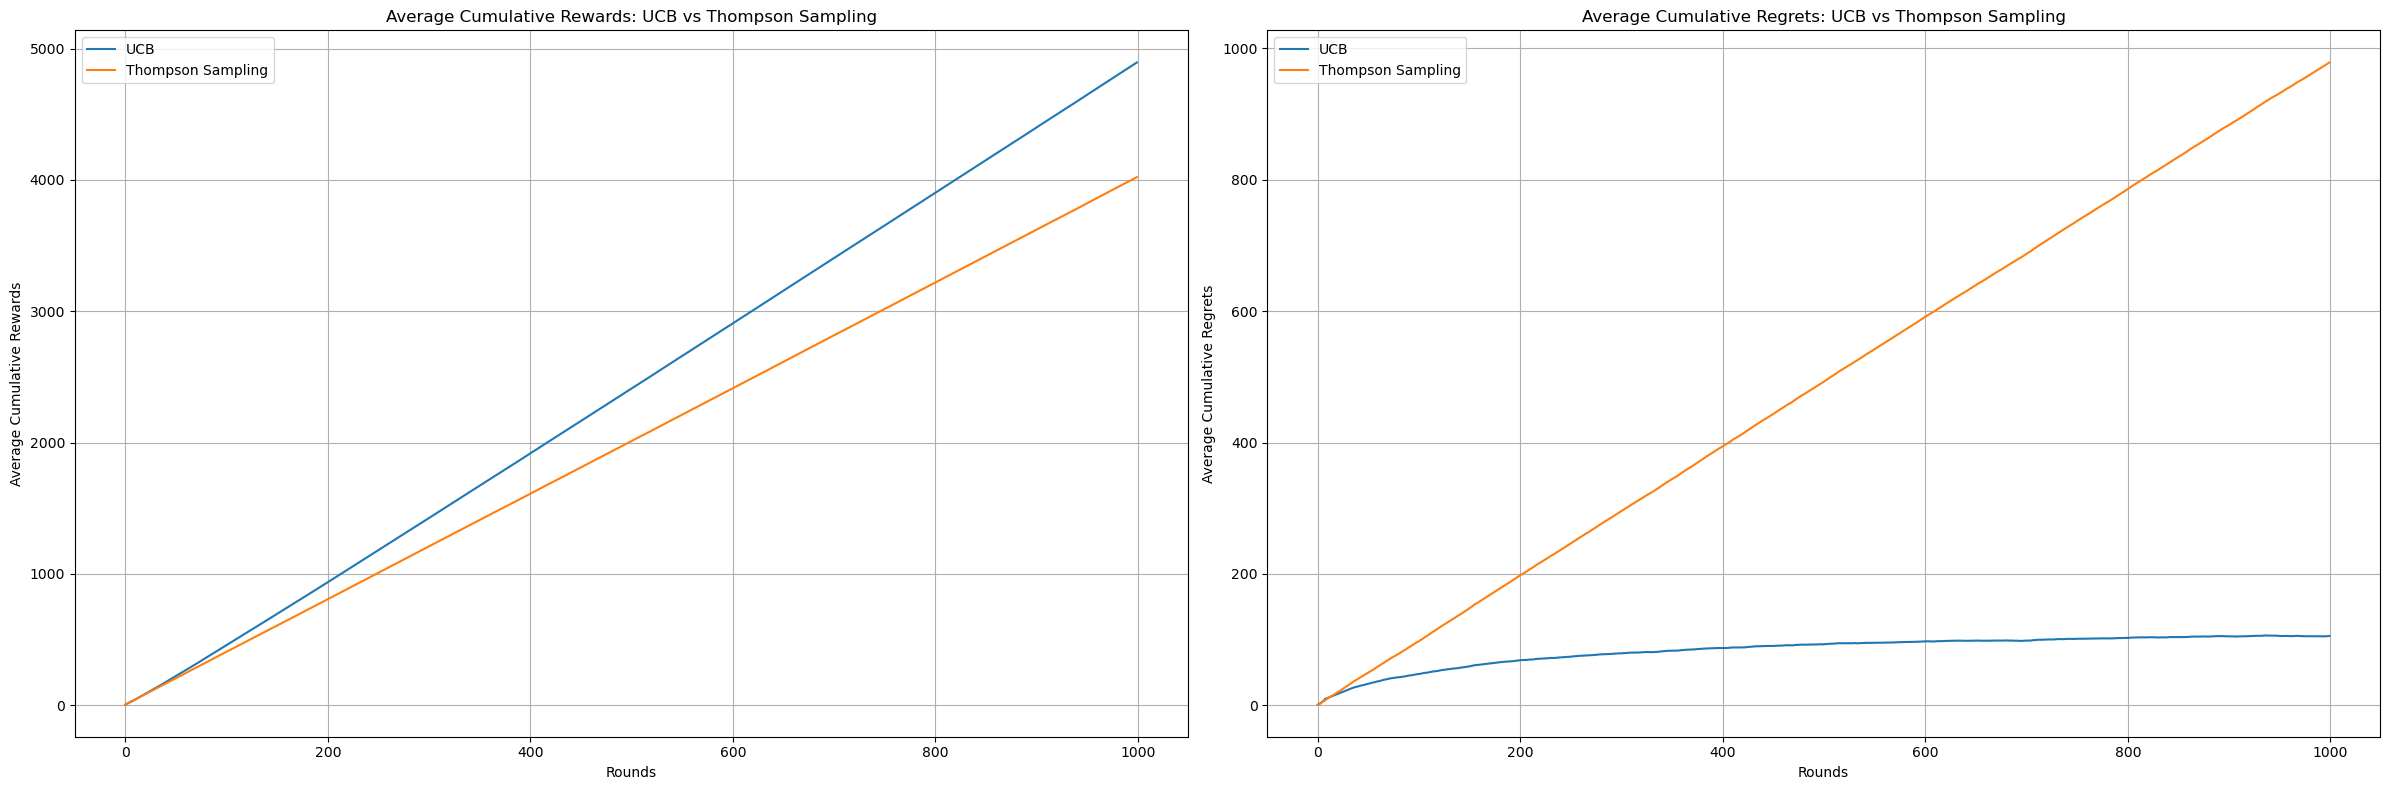

In [8]:
plot_results(cumulative_rewards_UCB, cumulative_rewards_TS, cumulative_regret_UCB, cumulative_regret_TS)

It is visible that UCB outperforms Thompson Sampling. UCB has higher rewards and lower regrets than Thompson Sampling. The final average cumulative rewards for UCB and TS respectively are approximately 4894 and 4021, whereas the regrets are approximately 105 and 978.

## Part d

In [9]:
import pandas as pd

In [10]:
hist_data = pd.read_csv("hist_data.csv")

In [11]:
def initialize_arms_with_hist_data(arms, hist_data):
    for i, arm in enumerate(arms):
        arm_rewards = hist_data.iloc[:, i].dropna().values
        for reward in arm_rewards:
            arm.update(reward)

In [12]:
best_arm_reward_hist = hist_data.mean().max()
cumulative_rewards_UCB = []
cumulative_rewards_TS = []
cumulative_regret_UCB = []
cumulative_regret_TS = []
for sim in range(num_sim):
    
    arms_ucb_hist = GetArms(K, mu, sigma_squared)
    arms_thompson_sampling_hist = GetArms(K, mu, sigma_squared)
    initialize_arms_with_hist_data(arms_ucb_hist, hist_data)
    initialize_arms_with_hist_data(arms_thompson_sampling_hist, hist_data)
    
    rewards_ucb_hist, regrets_ucb_hist = ucb(arms_ucb_hist, horizon, best_arm_reward_hist)
    rewards_thompson_sampling_hist, regrets_thompson_sampling_hist = thompson_sampling(arms_thompson_sampling_hist, horizon, best_arm_reward_hist)

    cumulative_rewards_ucb_hist = np.cumsum(rewards_ucb_hist)
    cumulative_regrets_ucb_hist = np.cumsum(regrets_ucb_hist)
    cumulative_rewards_thompson_sampling_hist = np.cumsum(rewards_thompson_sampling_hist)
    cumulative_regrets_thompson_sampling_hist = np.cumsum(regrets_thompson_sampling_hist)

    cumulative_rewards_UCB.append(cumulative_rewards_ucb_hist)
    cumulative_rewards_TS.append(cumulative_rewards_thompson_sampling_hist)
    cumulative_regret_UCB.append(cumulative_regrets_ucb_hist)
    cumulative_regret_TS.append(cumulative_regrets_thompson_sampling_hist)

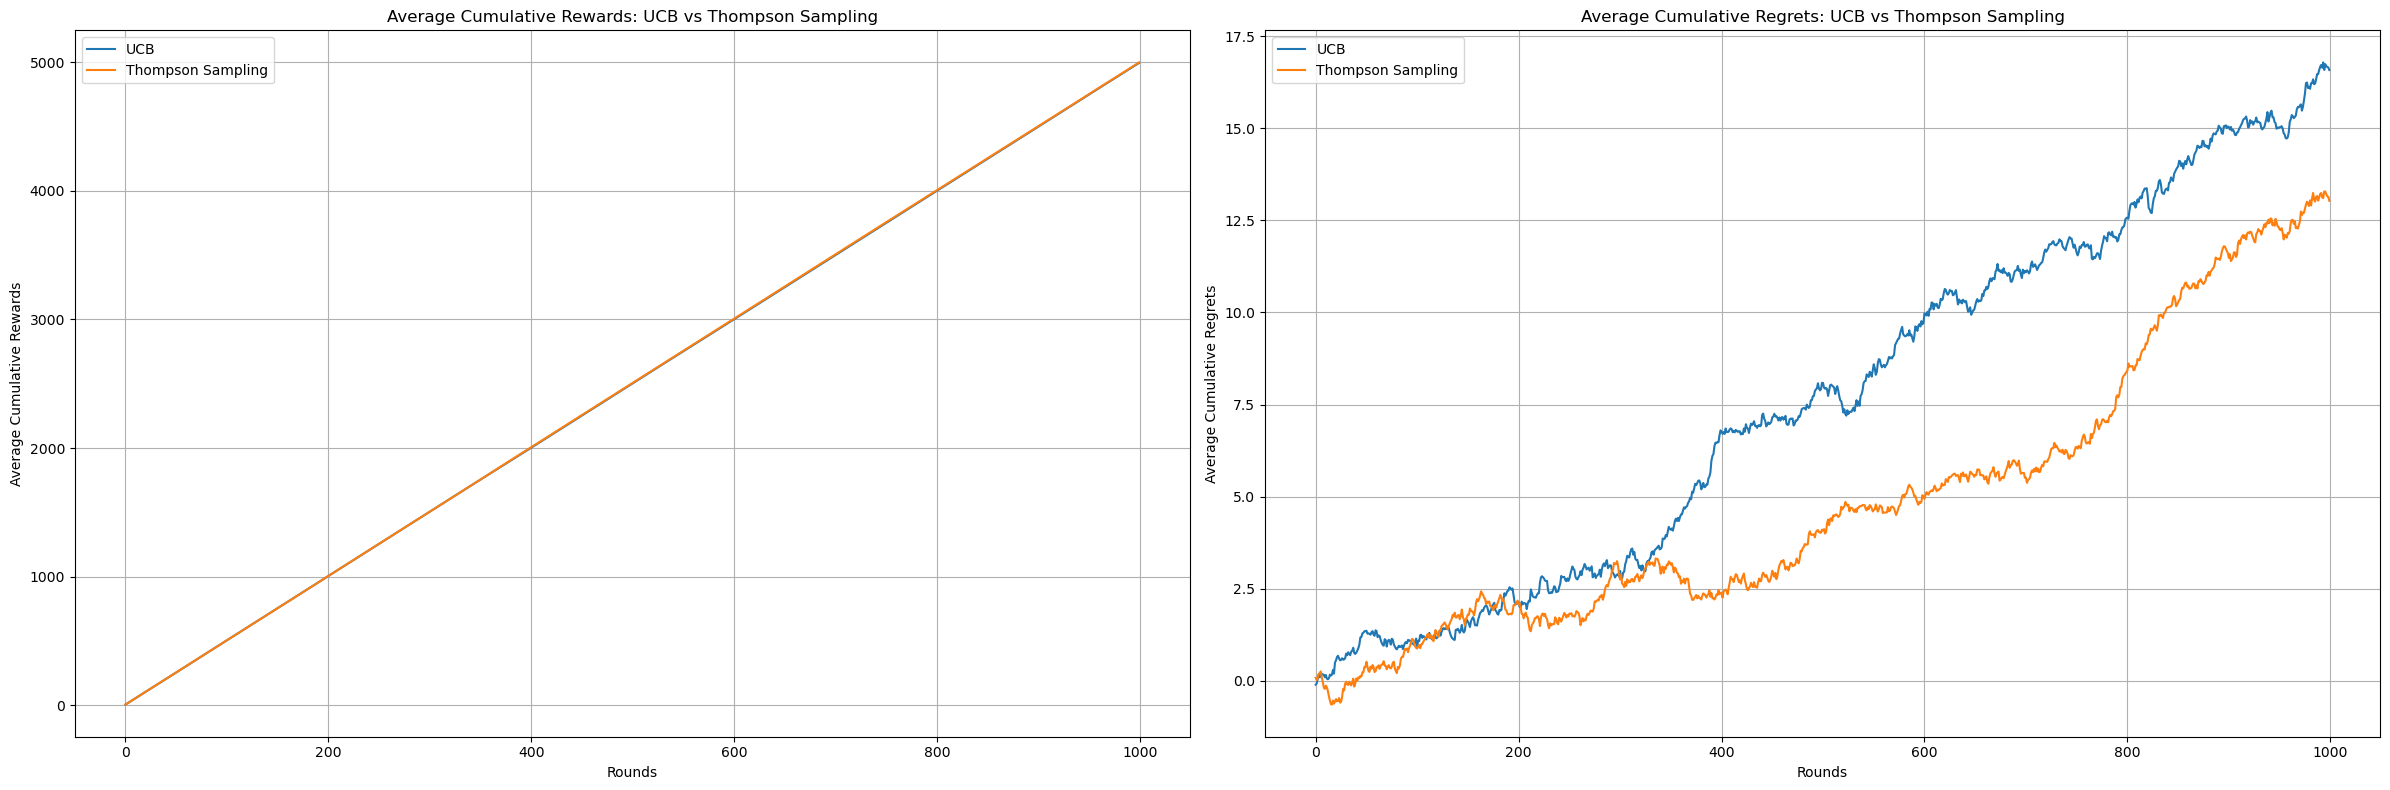

In [13]:
plot_results(cumulative_rewards_UCB, cumulative_rewards_TS, cumulative_regret_UCB, cumulative_regret_TS)

The cumulative rewards at the end of the simulation horizon for the UCB and Thompson Sampling algorithms with using historical data are approximately 4995 and 4998, whereas the regrets are approximately 16 and 13, respectively. In Part c without using historical data the final average cumulative rewards were approximately 4894 for UCB and 4021 for Thompson Sampling, and the regrets 105 and 978. We can observe that:

- The UCB algorithm with historical data performed a little better than without it (an increase from 4894 to 4995), the regret lowered from 105 to 16.
- The Thompson Sampling algorithm with historical data showed a more significant improvement in performance compared to without it (an increase from 4021 to 4998), the regret decreased significantly from 978 to 13.
- Using historical data has more positive effect on the Thompson Sampling algorithm in our simulation. This is likely because the Thompson Sampling algorithm benefits from updated prior distributions that better reflect the underlying reward probabilities of each arm.
- The overall performance of both algorithms seems close based on the average cumulative rewards plot, where the averages are calculated from 100 simulations.
- In conclusion, both algorithms benefit significantly from the historical data, with nearly identical final cumulative rewards, and signficantly lower regrets.

## Part e

In [14]:
hist_data_2 = pd.read_csv("hist_data2.csv")

In [15]:
best_arm_reward_hist = hist_data_2.mean().max()
cumulative_rewards_UCB = []
cumulative_rewards_TS = []
cumulative_regret_UCB = []
cumulative_regret_TS = []
for sim in range(num_sim):
    
    arms_ucb_hist = GetArms(K, mu, sigma_squared)
    arms_thompson_sampling_hist = GetArms(K, mu, sigma_squared)
    initialize_arms_with_hist_data(arms_ucb_hist, hist_data)
    initialize_arms_with_hist_data(arms_thompson_sampling_hist, hist_data)
    
    rewards_ucb_hist, regrets_ucb_hist = ucb(arms_ucb_hist, horizon, best_arm_reward_hist)
    rewards_thompson_sampling_hist, regrets_thompson_sampling_hist = thompson_sampling(arms_thompson_sampling_hist, horizon, best_arm_reward_hist)

    cumulative_rewards_ucb_hist = np.cumsum(rewards_ucb_hist)
    cumulative_regrets_ucb_hist = np.cumsum(regrets_ucb_hist)
    cumulative_rewards_thompson_sampling_hist = np.cumsum(rewards_thompson_sampling_hist)
    cumulative_regrets_thompson_sampling_hist = np.cumsum(regrets_thompson_sampling_hist)

    cumulative_rewards_UCB.append(cumulative_rewards_ucb_hist)
    cumulative_rewards_TS.append(cumulative_rewards_thompson_sampling_hist)
    cumulative_regret_UCB.append(cumulative_regrets_ucb_hist)
    cumulative_regret_TS.append(cumulative_regrets_thompson_sampling_hist)

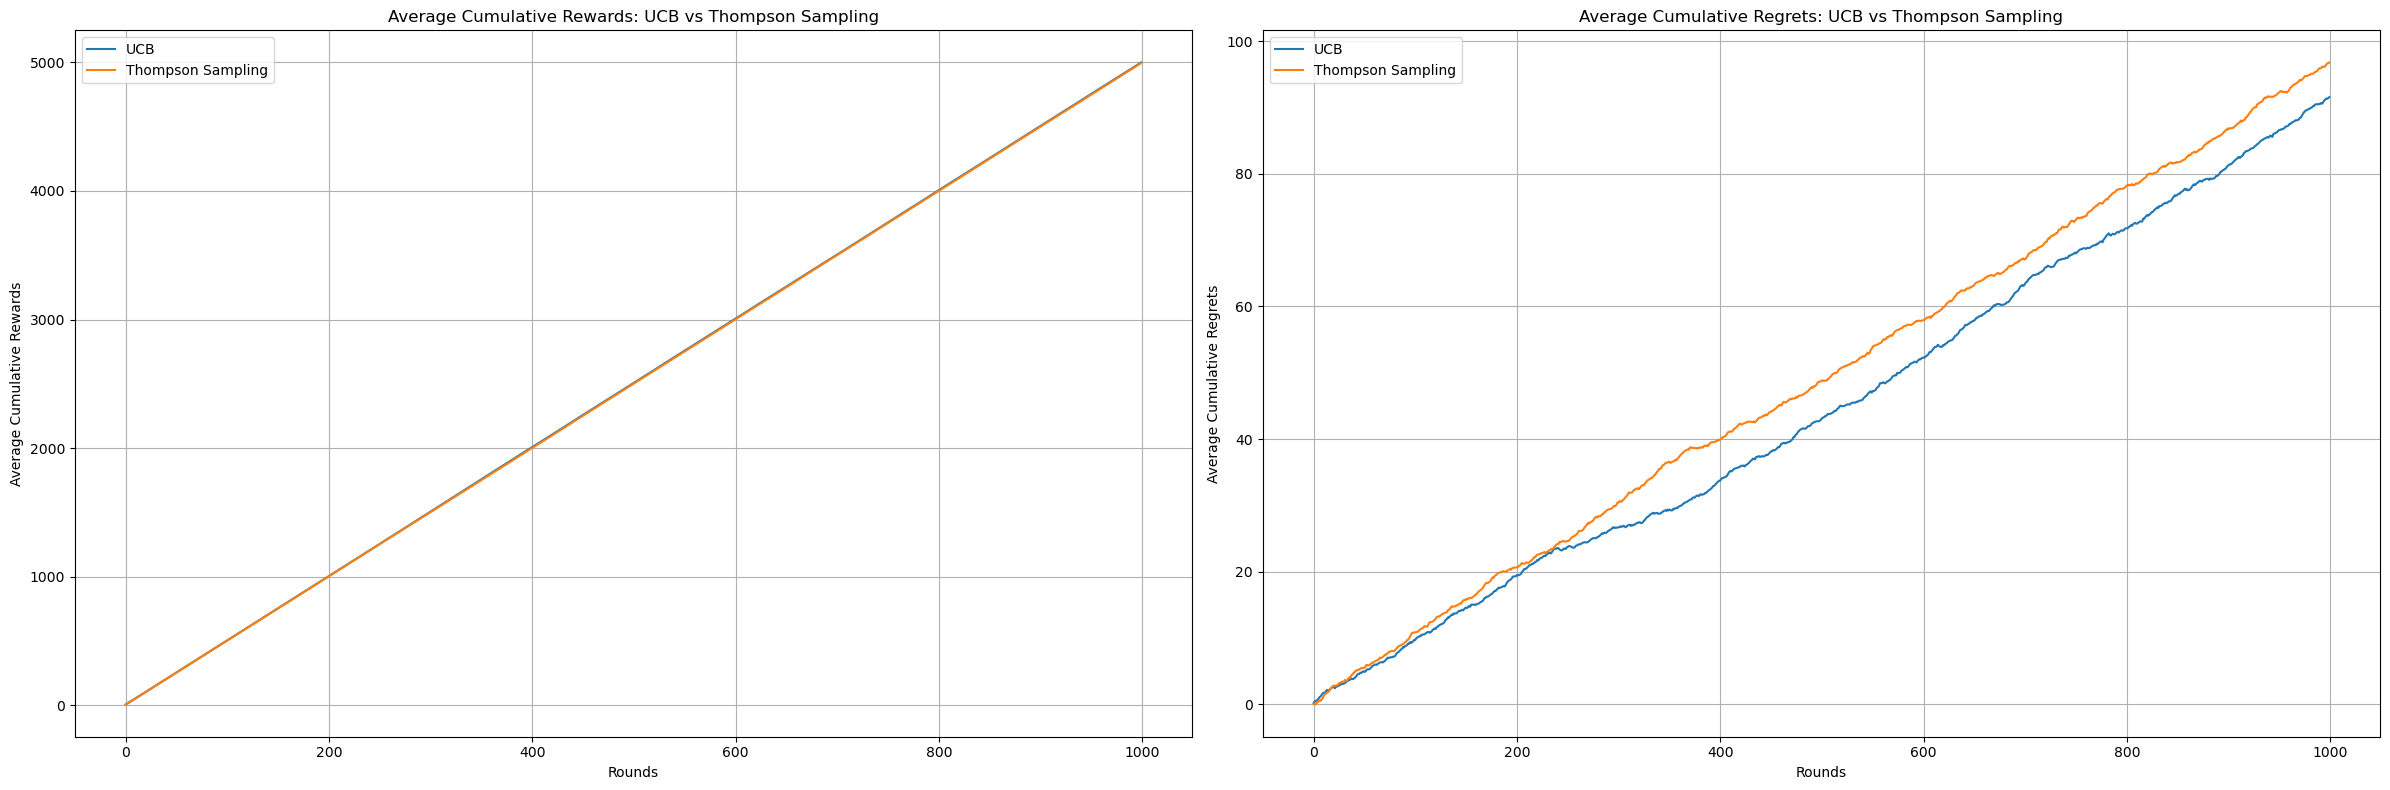

In [16]:
plot_results(cumulative_rewards_UCB, cumulative_rewards_TS, cumulative_regret_UCB, cumulative_regret_TS)

With the new historical, the final average cumulative rewards at the end of the simulation horizon for the UCB and Thompson Sampling algorithms are approximately 4999 and 4994, respectively, and the regrets are 91 and 96. In Part c (without historical data), the final average cumulative rewards were approximately 4894 for UCB and 4021 for Thompson Sampling, and the regrets 105 and 978. In Part d (with `hist_data`), the rewards improved to approximately 4995 for UCB and 4998 for Thompson Sampling, and the regrets to 16 and 13. With `hist_data2` both algorithms show pretty much the same rewards as in Part d, but signifcant worsening in the regret is observed compared to Part d, although it is still better than part c. These observations suggest that the alternative historical data may not have been as beneficial for initializing the algorithms.

There are some possible chareacteristics of the alternative historical data leading to the general decrease in regret compared to Part d. For example,the second historical data might not align well with the true means of the arms specified for the simulation, leading to making suboptimal choices early on, and hence increasing the cumulatice regret. Similarly, the historical data could introduce a bias towards less profitable arms, leading once again to an initial period of exploitation of suboptimal arms. This would delay the algorithms' convergence to the optimal arm, reducing overall performance. Finally, the variance within the alternative historical data and the sample size for each arm might also contribute to less accurate initial estimates, affecting both exploration and exploitation phases.

We can conclude that the historical data impact on the performance of the observed bandit algorithms can vary significantly based on the data's relevance and accuracy. In scenarios where the historical data may not accurately reflect the current environment or the distributions of rewards, it might be more prudent to rely more on real-time exploration and exploitation rather than heavily weighting past observations.

## Part f

The UCB algorithm selects arms based on a balance between their empirical mean rewards and a confidence interval that grows smaller as the number of plays increases. For each arm $k$ at time $t$, the UCB algorithm calculates an upper confidence bound as:

$$
UCB_t(k) = \hat{\mu}_k + \sqrt{\frac{2 \sigma^2 \log(t)}{n_k}}
$$

where $\hat{\mu}_k$ is the empirical mean reward of arm $k$, $\sigma^2$ is the variance of the reward distribution, $t$ is the total number of times all arms have been played, $n_k$ is the number of times arm $k$ has been played. In the modified version of the algorithm we incorporate histroical data, responsible for initialising the best mean reward. Hence, there is a possibility that the empirical mean of the a suboptimal arm is severly overestimated, or the empriical mean of the optimal arm $k$ is severely underestimated. If the UCB algorithm never plays the optimal arm this means this potential over/underestimation should persist with the increase of $t$, or in other words to continue to maintain a higher UCB value for the suboptimal arm than for the optimal.

Let $i$ be the optimal arm with true average reward $\mu_i$, $j$ be a suboptimal arm with true average reward $\mu_j < \mu_i$, but it has misleadingly favorable historical data. Hence, historical data results in $\hat{\mu}_j > \hat{\mu}_i$, despite $\mu_j < \mu_i$. If the historical data is such that $\hat{\mu}_j$ is significantly overestimated, and $n_j$ is large, the confidence interval term $\sqrt{\frac{2 \sigma^2 \log(t)}{n_j}}$ is small. Hence, if $\hat{\mu}_j$ is inflated enough, $UCB_t(j)$ could remain higher than $UCB_t(i)$ for the optimal arm $i$.

For arm $i$ to be never selected,

$$
UCB_t(j) > UCB_t(i), \quad \forall t
$$

Given that $\hat{\mu}_j > \hat{\mu}_i$ due to historical data, and assuming $\sqrt{\frac{2 \sigma^2 \log(t)}{n_j}}$ becomes negligible for $j$, the condition simplifies to showing that the inflated estimate $\hat{\mu}_j$ can remain high enough to keep $UCB_t(j) > UCB_t(i)$, even as $t$ increases. 

The term $\log(t)$ grows slower than linear, meaning the confidence interval for arm $i$ grows slower if $n_i$ remains low. If $n_j$ is sufficiently large from the start, the growth rate of the confidence bound for $j$ may not be enough to allow $i$'s UCB to surpass $j$'s.

The proof hinges on the fact that misleading historical data can artificially inflate $\hat{\mu}_j$ and $n_j$, diminishing the exploration incentive for other arms by manipulating the exploration-exploitation trade-off. This scenario requires specific conditions: significantly inflated historical estimates and a large disparity in initial $n_k$ values. In conclusion, the analysis shows that under certain extreme conditions it is theoretically possible for the algorithm to consistently prefer a suboptimal arm over the optimal one.

## Part g

Using historical data with UCB or Thompson Sampling (TS) algorithms in multi-armed bandit problems has its advantages and challenges. Some pros are that, as already mentioned a few times, historical data can accelerate the learning process by providing a prior understanding of each arm's performance, leading to faster convergence. Also, starting with historical data reduces the need for exploration by leveraging past observations. In some cases initial decisions are more informed, potentially leading to better early-stage performance compared to starting from scratch.

On the other hand, historical data might not always be representative of the current situation, especially in non-stationary environments. There also exists the risk of introducing bias if the historical data is skewed or if it overly influences the algorithm towards suboptimal arms based on past performance that is no longer relevant. In general, relying too heavily on historical data can lead to overfitting, where the algorithm performs well on the historical scenarios but less so on new or unseen data.

The fundamental challenge in bandit problems—balancing exploration with exploitation is further complicated by the introduction of historical data. Effective use of historical data requires mechanisms to mitigate potential biases and adaptively adjust the exploration-exploitation balance based on ongoing learning. To better leverage historical data, some basic modifications to bandit algorithms could be made such as gradually decreasing the influence of historical data as more real-time data is collected, to mitigate initial biases, implementing mechanisms to detect significant changes in the reward distributions (which could trigger adjustments in the reliance on historical data), or combining historical data-driven initialization with adaptive learning rates or exploration parameters that adjust based on the algorithm's performance and convergence rate.